In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("50_startups.csv")

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Profit - Dependent variable

state = catogorical variable

In [5]:
# Encoding Shortcut
data = pd.get_dummies(data, columns=['State'], drop_first= True)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [6]:
X = data.drop('Profit', axis=1)

In [7]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [8]:
y = data['Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_teat = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 33 to 44
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        40 non-null     float64
 1   Administration   40 non-null     float64
 2   Marketing Spend  40 non-null     float64
 3   State_Florida    40 non-null     uint8  
 4   State_New York   40 non-null     uint8  
dtypes: float64(3), uint8(2)
memory usage: 1.3 KB


In [12]:
# Importing linear regression
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
print(y_pred)

[103015.20159796 132582.27760816 132447.73845174  71976.09851258
 178537.48221055 116161.24230165  67851.69209676  98791.73374687
 113969.43533012 167921.0656955 ]


In [17]:
print(y_teat)

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64


## Building a optimal model using backward elimination

In [22]:
import statsmodels.api as sm

#### Add a extra column filled with '1' to X

In [19]:
X.shape[0]

50

In [20]:
X = np.append(arr=np.ones((X.shape[0], 1)).astype(int), values= X, axis= 1)

In [23]:
X_opt = X[:, [0, 1, 2, 3, 4, 5]]

regressor_OLS = sm.OLS(endog= y, exog=X_opt).fit()


In [24]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           1.34e-27
Time:                        13:30:36   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x5           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
X_opt = X[:, [0, 1, 2, 3, 4]]

regressor_OLS = sm.OLS(endog= y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           8.49e-29
Time:                        13:33:50   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1             0.8060      0.046     17.606      0.000       0.714       0.898
x2            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x3             0.0270      0.017      1.592      0.118      -0.007       0.061
x4           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
X_opt = X[:, [0, 1, 2, 3]]

regressor_OLS = sm.OLS(endog= y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           4.53e-30
Time:                        13:34:20   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
X_opt = X[:, [0, 1, 3, 4]]

regressor_OLS = sm.OLS(endog= y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     294.1
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           5.19e-30
Time:                        13:35:21   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1067.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.695e+04   2761.499     17.002      0.000    4.14e+04    5.25e+04
x1             0.7967      0.042     19.024      0.000       0.712       0.881
x2             0.0298      0.016      1.863      0.069      -0.002       0.062
x3           150.7580   2874.516      0.052      0.958   -5635.342    5936.858
==============================================================================
Omnibus:                       14.628   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.992
Skew:                          -0.938   Prob(JB):                     2.76e-05
Kurtosis:                       5.560   Cond. No.                     5.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X_opt = X[:, [0, 1, 3]]

regressor_OLS = sm.OLS(endog= y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           2.16e-31
Time:                        13:36:38   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
X_opt = X[:, [0, 1]]

regressor_OLS = sm.OLS(endog= y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           3.50e-32
Time:                        13:38:02   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
print(X_opt)

[[1.0000000e+00 1.6534920e+05]
 [1.0000000e+00 1.6259770e+05]
 [1.0000000e+00 1.5344151e+05]
 [1.0000000e+00 1.4437241e+05]
 [1.0000000e+00 1.4210734e+05]
 [1.0000000e+00 1.3187690e+05]
 [1.0000000e+00 1.3461546e+05]
 [1.0000000e+00 1.3029813e+05]
 [1.0000000e+00 1.2054252e+05]
 [1.0000000e+00 1.2333488e+05]
 [1.0000000e+00 1.0191308e+05]
 [1.0000000e+00 1.0067196e+05]
 [1.0000000e+00 9.3863750e+04]
 [1.0000000e+00 9.1992390e+04]
 [1.0000000e+00 1.1994324e+05]
 [1.0000000e+00 1.1452361e+05]
 [1.0000000e+00 7.8013110e+04]
 [1.0000000e+00 9.4657160e+04]
 [1.0000000e+00 9.1749160e+04]
 [1.0000000e+00 8.6419700e+04]
 [1.0000000e+00 7.6253860e+04]
 [1.0000000e+00 7.8389470e+04]
 [1.0000000e+00 7.3994560e+04]
 [1.0000000e+00 6.7532530e+04]
 [1.0000000e+00 7.7044010e+04]
 [1.0000000e+00 6.4664710e+04]
 [1.0000000e+00 7.5328870e+04]
 [1.0000000e+00 7.2107600e+04]
 [1.0000000e+00 6.6051520e+04]
 [1.0000000e+00 6.5605480e+04]
 [1.0000000e+00 6.1994480e+04]
 [1.0000000e+00 6.1136380e+04]
 [1.0000

In [35]:
print(y.shape)
print(X_opt[:, 1].shape)

(50,)
(50,)


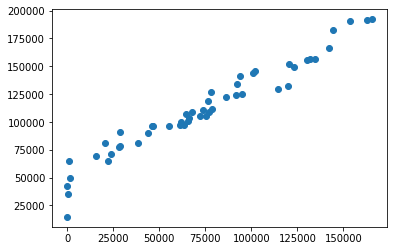

In [36]:
import matplotlib.pyplot as plt

plt.scatter(X_opt[:, 1], y)
plt.show()

In [38]:
from sklearn import linear_model

model = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size=0.2)

model.fit(X_train, y_train)

y_test.shape

(10,)

In [40]:
y_pred = model.predict(X_test)

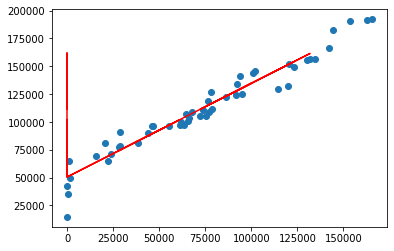

In [42]:
plt.scatter(X_opt[:, 1], y)
plt.plot(X_test, y_pred, color='red')
plt.show()